<a href="https://colab.research.google.com/github/debasishcharanbehera1998/Assignments/blob/ML-Models/Covid_19_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project : Analyzing the Trends of COVID-19 with Python**

## Problem Statement:

Given data about COVID-19 patients, write code to visualize the impact and
analyze the trend of rate of infection and recovery as well as make predictions
about the number of cases expected a week in future based on the current
trends.
Dataset:
CSV and Excel files containing data about the number of COVID-19 confirmed
deaths and recovered patients both around the world and in India.
Guidelines:

● Use pandas to accumulate data from multiple data files.

● Use plotly (visualization library) to create interactive visualizations.

● Use Facebook prophet library to make time series models.

● Visualize the prediction by combining these technologies.


In [1]:
import os

In [5]:
os.chdir(r"/content/drive/MyDrive/Colab Notebooks/Input Files")

In [7]:
import pandas as pd
import numpy as np

In [29]:
df = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/Input Files/covid_19_clean_complete.csv")

In [30]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


**Structuring columns**

Columns need to be restructured as name is diferent, so we need to rename the columns.

In [31]:
# Old Column names
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [32]:
df.rename(columns={'Country/Region':'country',
                    'Confirmed':'confirmed',
                     'Deaths':'deaths',
                     'Recovered':'recovered',
                     'Active':'active',
                     'Date':'date',
                     'Province/State':'state'},
               inplace = True
               )

In [34]:
# New columns
df.columns

Index(['state', 'country', 'Lat', 'Long', 'date', 'confirmed', 'deaths',
       'recovered', 'active', 'WHO Region'],
      dtype='object')

# **Data Cleaning process**

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   state       14664 non-null  object 
 1   country     49068 non-null  object 
 2   Lat         49068 non-null  float64
 3   Long        49068 non-null  float64
 4   date        49068 non-null  object 
 5   confirmed   49068 non-null  int64  
 6   deaths      49068 non-null  int64  
 7   recovered   49068 non-null  int64  
 8   active      49068 non-null  int64  
 9   WHO Region  49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


Here, Date is of object type. This should be date time format

In [36]:
df["date"] = pd.to_datetime(df["date"])

In [38]:
# Now data frame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   state       14664 non-null  object        
 1   country     49068 non-null  object        
 2   Lat         49068 non-null  float64       
 3   Long        49068 non-null  float64       
 4   date        49068 non-null  datetime64[ns]
 5   confirmed   49068 non-null  int64         
 6   deaths      49068 non-null  int64         
 7   recovered   49068 non-null  int64         
 8   active      49068 non-null  int64         
 9   WHO Region  49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


# **1st Day Of COVID Reported Cases Analytics**

When 1st case of Covid was recorded in this world

In [101]:
df["date"].min()

Timestamp('2020-01-22 00:00:00')

Let's see the number of cases registered in 1st day.

In [102]:
top_df_firstday = df[df["date"] == df["date"].min()] ## 261 cases where registered on 1st day itself
top_df_firstday

,state,country,Lat,Long,date,confirmed,deaths,recovered,active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
256,NaN,Sao Tome and Principe,0.186400,6.613100,2020-01-22,0,0,0,0,Africa
257,NaN,Yemen,15.552727,48.516388,2020-01-22,0,0,0,0,Eastern Mediterranean
258,NaN,Comoros,-11.645500,43.333300,2020-01-22,0,0,0,0,Africa
259,NaN,Tajikistan,38.861000,71.276100,2020-01-22,0,0,0,0,Europe


Let's see contry wise how many cases were recorded on first day

In [103]:
new_df_firstday= top_df_firstday.groupby("country")[["confirmed", "deaths", "recovered",  "active"]].sum().reset_index()

In [104]:
new_df_firstday.head()

,country,confirmed,deaths,recovered,active
0,Afghanistan,0,0,0,0
1,Albania,0,0,0,0
2,Algeria,0,0,0,0
3,Andorra,0,0,0,0
4,Angola,0,0,0,0


In [105]:
# We can also do using pivot table
new_df_firstday.pivot_table(index = "country", values=["confirmed", "deaths", "recovered","active" ] , aggfunc="sum" ).reset_index()

,country,active,confirmed,deaths,recovered
0,Afghanistan,0,0,0,0
1,Albania,0,0,0,0
2,Algeria,0,0,0,0
3,Andorra,0,0,0,0
4,Angola,0,0,0,0
...,...,...,...,...,...
182,West Bank and Gaza,0,0,0,0
183,Western Sahara,0,0,0,0
184,Yemen,0,0,0,0
185,Zambia,0,0,0,0


# **Last Day Of COVID Reported Cases Analytics**

In [60]:
df["date"].max()

Timestamp('2020-07-27 00:00:00')

In [63]:
df_lastday = df[df["date"] == df["date"].max()]
df_lastday

,state,country,Lat,Long,date,confirmed,deaths,recovered,active,WHO Region
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [66]:
new_df_lastday = df_lastday.groupby("country")[["confirmed", "deaths", "recovered",  "active"]].sum().reset_index()
new_df_lastday

,country,confirmed,deaths,recovered,active
0,Afghanistan,36263,1269,25198,9796
1,Albania,4880,144,2745,1991
2,Algeria,27973,1163,18837,7973
3,Andorra,907,52,803,52
4,Angola,950,41,242,667
...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791
183,Western Sahara,10,1,8,1
184,Yemen,1691,483,833,375
185,Zambia,4552,140,2815,1597


# **Plot Our Graphs Using Plotly**

In [96]:
# Using the plotly library to do the following
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots

In [171]:
import plotly.express as px

# Create individual choropleth plots
fig1 = px.choropleth(
    new_df_firstday,
    locations="country",
    locationmode="country names",
    color="deaths",
    hover_name="country",
    range_color=[1, 50000],
    color_continuous_scale='Peach',
    title="Number of deaths as on 2020-07-27"
)

fig2 = px.choropleth(
    new_df_lastday,
    locations="country",
    locationmode="country names",
    color="deaths",
    hover_name="country",
    range_color=[1, 50000],
    color_continuous_scale='Peach',
    title="Number of deaths as on 2020-01-22"
)

# Update layout to combine the two plots
fig1.update_layout(
    #title_text="Subplots of Number of Deaths",
    geo=dict(
        domain=dict(
            x=[0, 0.5],  # Adjust the domain for the first plot
            y=[0, 1]
        )
    )
)

fig2.update_layout(
    geo=dict(
        domain=dict(
            x=[0.5, 1],  # Adjust the domain for the second plot
            y=[0, 1]
        )
    )
)

# Show the combined plot
fig1.show()
fig2.show()


# **Total Number of Confirmed Cases and its trend in time**

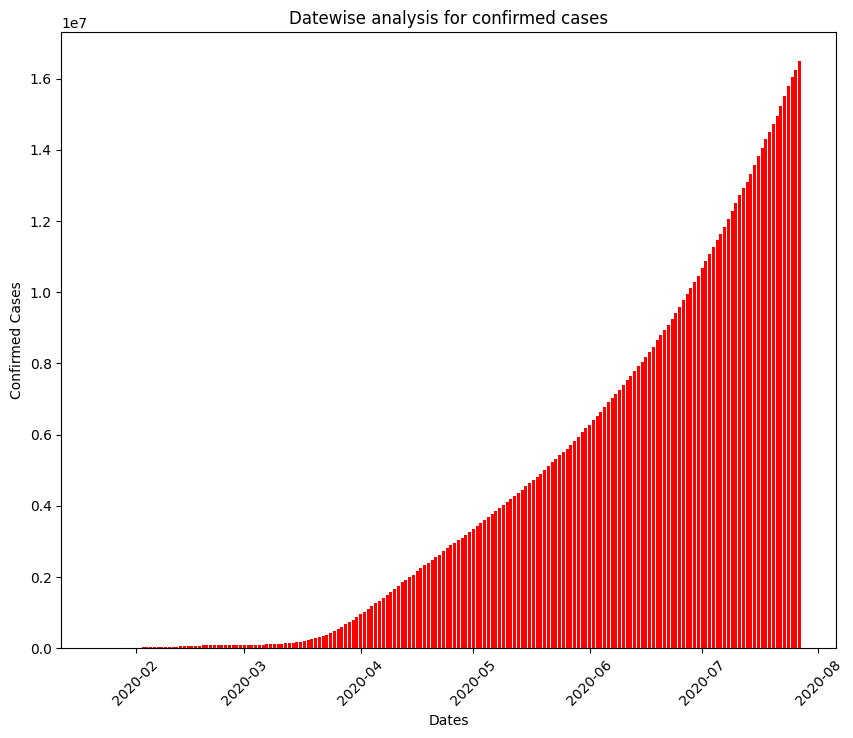

In [115]:
plt.figure(figsize=(10,8))
total_confirmed_cases = df.groupby('date')['confirmed'].sum().reset_index()
plt.bar(data=total_confirmed_cases , x="date", height = "confirmed", color = "red")
plt.xlabel('Dates')
plt.ylabel('Confirmed Cases')
plt.title('Datewise analysis for confirmed cases')
plt.xticks(rotation=45)
plt.show()

# **Forecasting**

**Using FB prophet:**

Facebook Prophet is a forecasting tool developed by Facebook's Core Data Science team. It is designed to handle time series data with multiple seasonality and holiday effects. Prophet is particularly useful for forecasting tasks where the data has strong seasonal patterns and includes outliers.

Here's an explanation of how Prophet works and how you can use it for forecasting:

1. Components of Time Series:
Prophet decomposes time series data into three main components:

  a. Trend: The long-term direction in which the data is moving.

  b. Seasonality: Periodic fluctuations, such as daily, weekly, or yearly patterns.

  c. Holidays: Events that occur irregularly and may impact the time series.

2. Modeling Approach:

    Prophet uses an additive model, meaning it models the trend, seasonality, and holiday effects as additive components. The general model equation is:

      y(t) = g(t) + s(t) + h(t) + ε(t)

    where,

    g(t): Trend component

    s(t): Seasonality component

    h(t): Holiday component

    ε(t): Error term

3. Automatic Seasonality Detection:

Prophet automatically detects seasonal patterns in the data using Fourier series to model periodic effects. It can handle multiple seasonalities, such as daily, weekly, and yearly patterns.

4. Handling Holidays:

Prophet allows you to specify holidays that impact your time series. It includes built-in support for many country-specific holidays, but you can also define custom holiday dates.

5. Uncertainty Estimation:

Prophet provides uncertainty estimates for the forecasted values. It uses Markov chain Monte Carlo (MCMC) methods to generate samples from the posterior predictive distribution, allowing you to quantify the uncertainty in the forecasts.

6. Flexible Parameters:

Prophet offers several parameters that you can tune to customize the forecasting model, including seasonality parameters, holidays, trend flexibility, and changepoint detection.


**Sample Code Example:**

from fbprophet import Prophet
import pandas as pd

1. Create a DataFrame with 'ds' (datestamp) and 'y' (target variable)

  Example: df = pd.DataFrame({'ds': dates, 'y': values})


2. Initialize Prophet model

  model = Prophet()


3. Fit the model to the data
  
  model.fit(df)


4. Create a DataFrame with future dates for forecasting
  
  future_dates = model.make_future_dataframe(periods=365)  # Forecasting for 1 year (365 days)


5. Make predictions
  
  forecast = model.predict(future_dates)


6. Plot the forecast
   
   fig = model.plot(forecast)


In [126]:
# Import Prophet libarary
from prophet import Prophet

In [146]:
# Saving differenct dataset

confirmed_cases=df.groupby('date').sum()['confirmed'].reset_index()  # confirmed_cases
  # df.pivot_table(value = "confirmed", index = "date", aggfunc = "sum").reset_index() --- Other way to do same

confirmed_cases=df.groupby('date').sum()['recovered'].reset_index()  # Recovered Cases
  # df.pivot_table(value = "recovered", index = "date", aggfunc = "sum").reset_index()--- Other way to do same

confirmed_cases=df.groupby('date').sum()['active'].reset_index()  # Active Cases
  # df.pivot_table(value = "active", index = "date", aggfunc = "sum").reset_index()--- Other way to do same

**Forecasting for Active Cases only**

In [147]:
# Doing Analysis on confirmed Cases only
confirmed_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    188 non-null    datetime64[ns]
 1   active  188 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.1 KB


# **Creation of Model:**

'interval_width' is a parameter that sets the width of the uncertainty intervals for the forecast.

it has been set to 0.95 meaning the model will generate the prediction intervals that cover 95% of the forecast distribution.

In [158]:
# Creation of Model
model = Prophet(interval_width=0.95)

# **Training model based on our available data**

In [156]:
model.fit(confirmed_cases)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2j3j5i__/565lcehq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2j3j5i__/08hn_vmi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23779', 'data', 'file=/tmp/tmp2j3j5i__/565lcehq.json', 'init=/tmp/tmp2j3j5i__/08hn_vmi.json', 'output', 'file=/tmp/tmp2j3j5i__/prophet_modelle320zcs/prophet_model-20240411144918.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:49:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:49:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Since this model asks only for date as "ds" and "y" as target Variable, so lets rename our column here and try again fitting.

In [151]:
confirmed_cases.rename(columns ={"date" : "ds", "active": "y"}, inplace = True)

In [152]:
confirmed_cases

,ds,y
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010
...,...,...
183,2020-07-23,6166006
184,2020-07-24,6212290
185,2020-07-25,6243930
186,2020-07-26,6309711


Now since, we have changed to required alias, we have resolved. Lets deploy model.

In [159]:
model.fit(confirmed_cases)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2j3j5i__/0xz92mav.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2j3j5i__/uqs8e6d2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31771', 'data', 'file=/tmp/tmp2j3j5i__/0xz92mav.json', 'init=/tmp/tmp2j3j5i__/uqs8e6d2.json', 'output', 'file=/tmp/tmp2j3j5i__/prophet_modeld17n8klj/prophet_model-20240411144952.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:49:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:49:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# **Prediction of Future**


**make_future_dataframe** is a method provided from the Prophet library to generata dataframe on the basis of future predictions.

periods over here is the number of periods (in this case 7) into the future for which you want to generate the predictions

freq=D: it is a paramater that sets the frequency over the time series, in this case it is set to D that indicated daily frequency

so periods=14 will be predicting for next 14 dates from the last date entry as per freq ='D'

'W' - weeks , 'Y' - years, 'M' - months

In [160]:
Future = model.make_future_dataframe(periods=14, freq="D")

In [161]:
Future.head()

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26


**Prediction**

In [164]:
# Make Future DataFrame
future=model.predict(Future)
future

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-5.051890e+02,-7.880369e+04,5.891595e+04,-5.051890e+02,-5.051890e+02,-5734.813501,-5734.813501,-5734.813501,-5734.813501,-5734.813501,-5734.813501,0.0,0.0,0.0,-6.240003e+03
1,2020-01-23,1.357199e+03,-7.113658e+04,6.796976e+04,1.357199e+03,1.357199e+03,-2543.414742,-2543.414742,-2543.414742,-2543.414742,-2543.414742,-2543.414742,0.0,0.0,0.0,-1.186216e+03
2,2020-01-24,3.219587e+03,-6.303062e+04,7.327290e+04,3.219587e+03,3.219587e+03,3230.786676,3230.786676,3230.786676,3230.786676,3230.786676,3230.786676,0.0,0.0,0.0,6.450374e+03
3,2020-01-25,5.081975e+03,-5.907616e+04,8.524386e+04,5.081975e+03,5.081975e+03,3128.003846,3128.003846,3128.003846,3128.003846,3128.003846,3128.003846,0.0,0.0,0.0,8.209979e+03
4,2020-01-26,6.944363e+03,-5.484774e+04,8.704196e+04,6.944363e+03,6.944363e+03,8151.914786,8151.914786,8151.914786,8151.914786,8151.914786,8151.914786,0.0,0.0,0.0,1.509628e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,2020-08-06,6.919689e+06,6.812585e+06,7.012937e+06,6.840981e+06,7.000083e+06,-2543.414742,-2543.414742,-2543.414742,-2543.414742,-2543.414742,-2543.414742,0.0,0.0,0.0,6.917146e+06
198,2020-08-07,6.981956e+06,6.874260e+06,7.104557e+06,6.890924e+06,7.076864e+06,3230.786676,3230.786676,3230.786676,3230.786676,3230.786676,3230.786676,0.0,0.0,0.0,6.985187e+06
199,2020-08-08,7.044224e+06,6.928180e+06,7.160842e+06,6.937890e+06,7.155556e+06,3128.003846,3128.003846,3128.003846,3128.003846,3128.003846,3128.003846,0.0,0.0,0.0,7.047352e+06
200,2020-08-09,7.106491e+06,6.980310e+06,7.240375e+06,6.982342e+06,7.229157e+06,8151.914786,8151.914786,8151.914786,8151.914786,8151.914786,8151.914786,0.0,0.0,0.0,7.114643e+06


This  head predicted all. Let's Take only relevant columns

In [165]:
future[['yhat','yhat_lower','yhat_upper']]=future[['yhat','yhat_lower','yhat_upper']].astype(int)

In [166]:
future[['yhat','yhat_lower','yhat_upper']]

,yhat,yhat_lower,yhat_upper
0,-6240,-78803,58915
1,-1186,-71136,67969
2,6450,-63030,73272
3,8209,-59076,85243
4,15096,-54847,87041
...,...,...,...
197,6917145,6812584,7012937
198,6985187,6874259,7104557
199,7047351,6928179,7160841
200,7114643,6980310,7240375


In [167]:
future[['yhat','yhat_lower','yhat_upper']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   yhat        202 non-null    int64
 1   yhat_lower  202 non-null    int64
 2   yhat_upper  202 non-null    int64
dtypes: int64(3)
memory usage: 4.9 KB


# **Plotting the Predicted Values**

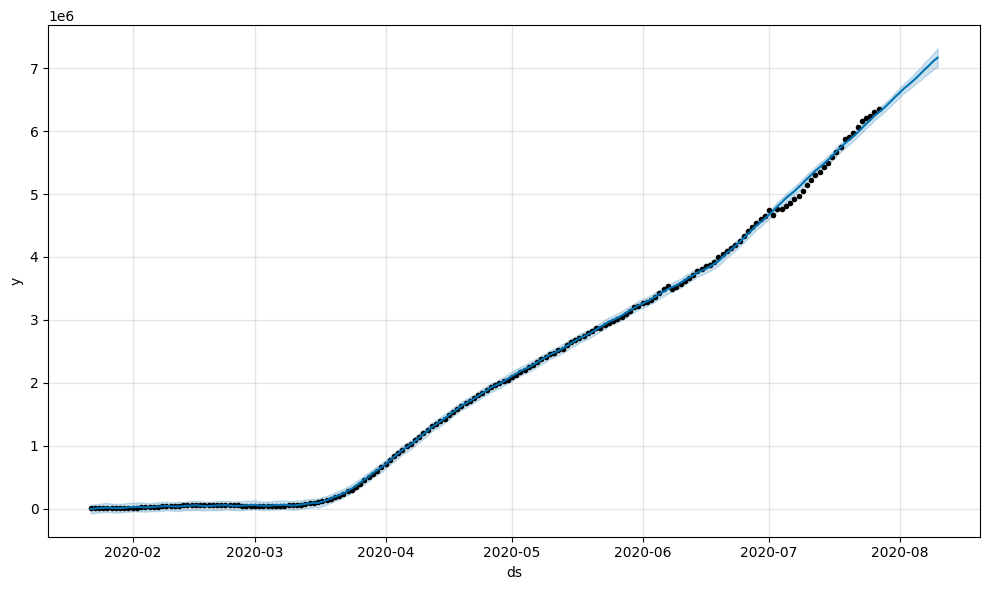

In [169]:
confirmed_cases_plot=model.plot(future)

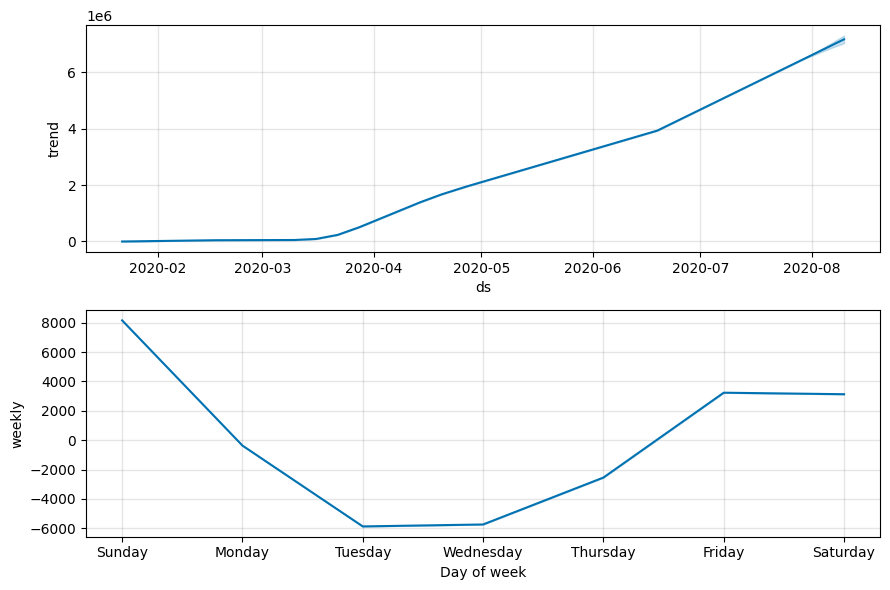

In [170]:
confirmed_cases_plot=model.plot_components(future)